# $(g-2)_\tau$ with ALPs

1911.06579

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})


In [5]:
fa = 1000
mtau = 1.77686
alpha_e = 1/137.035999084
max_ctau = 2*(8*np.pi/3)**0.5*fa/(2*mtau)

In [6]:
max_ctau

1628.9437649747704

In [7]:
def h1heavy(x):
    return 1 + 2*x - (x-1) * x*np.log(x)+2*x*(x-3)*(x/(x-4))**0.5*np.log((x**0.5+(x-4)**0.5)/2)

In [8]:
def h1light(x):
    return 1 + 2*x - (x-1) * x*np.log(x)+2*x*(x-3)*(x/(4-x))**0.5*np.arccos(x**0.5/2)

In [9]:
def h2heavy(x):
    return 1 - x/3 + x**2/6*np.log(x)-(x+2)/3*(x-4)**0.5*x**0.5*np.log((x**0.5+(x-4)**0.5)/2)

In [10]:
def h2light(x):
    return 1 - x/3 + x**2/6*np.log(x)+(x+2)/3*(4-x)**0.5*x**0.5*np.arccos(x**0.5/2)

In [11]:
def h2(x):
    if x > 4:
        return h2heavy(x)
    else:
        return h2light(x)

In [12]:
def F(z, x):
    yz = z*(1-z)*x
    return (h2(x/yz)-h2(x))/(1-yz)

In [13]:
def Delta_atau(atau, ma):
    if ma > 2*mtau:
        h1 = h1heavy
    else:
        h1 = h1light
    x = ma**2/mtau**2
    return - (mtau**2/(4*np.pi**2*fa**2)*atau**2*(h1(x)-2*alpha_e/np.pi*(np.log(fa**2/mtau**2) - h2(x)+quad(F, 0, 1, x)))[0]).real

In [14]:
x_atau = np.power(10, np.linspace(-1, np.log10(max_ctau), 50))

In [15]:
y_m0 = [Delta_atau(atau, 1e-8) for atau in x_atau]
y_m1GeV = [Delta_atau(atau, 1) for atau in x_atau]
y_m10GeV = [Delta_atau(atau, 10) for atau in x_atau]

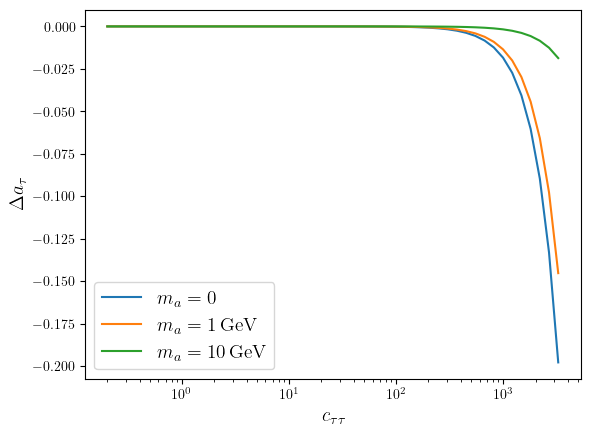

In [16]:
plt.semilogx(2*x_atau, y_m0, label = r"$m_a = 0$")
plt.semilogx(2*x_atau, y_m1GeV, label = r"$m_a = 1\,\mathrm{GeV}$")
plt.semilogx(2*x_atau, y_m10GeV, label = r"$m_a = 10\,\mathrm{GeV}$")
plt.xlabel(r"$c_{\tau\tau}$", fontsize=14)
plt.ylabel(r"$\Delta a_\tau$", fontsize=14)
plt.legend(fontsize=14)
plt.show()


In [17]:
x_ma = np.concatenate([np.power(10, np.linspace(-8, np.log10(1.98*mtau), 40)), np.linspace(1.981*mtau, 2.019*mtau, 50), np.power(10, np.linspace(np.log10(2.02*mtau), 1.4, 50))])

In [18]:
y_a1 = np.array([Delta_atau(0.8, float(ma)) for ma in x_ma])
y_a10 = np.array([Delta_atau(8, float(ma)) for ma in x_ma])
y_a100 = np.array([Delta_atau(80, float(ma)) for ma in x_ma])
y_a1000 = np.array([Delta_atau(800, float(ma)) for ma in x_ma])

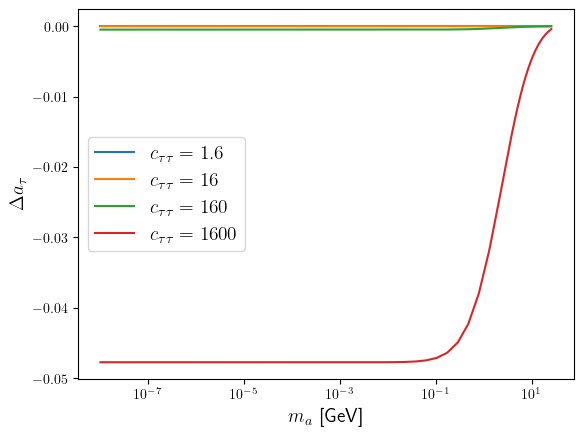

In [19]:
plt.semilogx(x_ma, y_a1, label=r"$c_{\tau\tau} = 1.6$")
plt.semilogx(x_ma, y_a10, label=r"$c_{\tau\tau} = 16$")
plt.semilogx(x_ma, y_a100, label=r"$c_{\tau\tau} = 160$")
plt.semilogx(x_ma, y_a1000, label=r"$c_{\tau\tau} = 1600$")
plt.xlabel(r"$m_a$ [GeV]", fontsize=14)
plt.ylabel(r"$\Delta a_\tau$", fontsize=14)
plt.legend(fontsize=14)
plt.show()

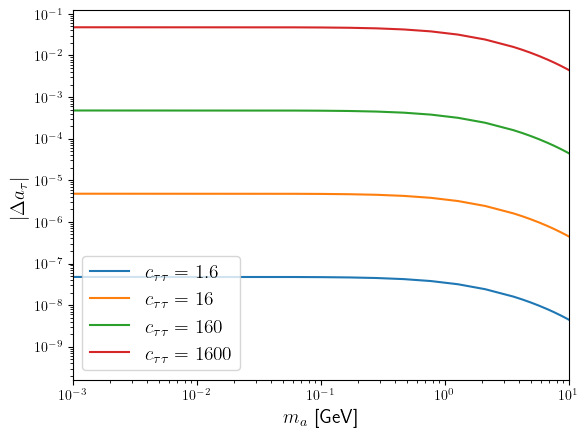

In [20]:
plt.loglog(x_ma, -y_a1, label=r"$c_{\tau\tau} = 1.6$")
plt.loglog(x_ma, -y_a10, label=r"$c_{\tau\tau} = 16$")
plt.loglog(x_ma, -y_a100, label=r"$c_{\tau\tau} = 160$")
plt.loglog(x_ma, -y_a1000, label=r"$c_{\tau\tau} = 1600$")
plt.xlabel(r"$m_a$ [GeV]", fontsize=14)
plt.ylabel(r"$|\Delta a_\tau|$", fontsize=14)
plt.xlim([1e-3, 10])
plt.legend(fontsize=14)
plt.show()

In [21]:
atau_SM = 117721e-8 # hep-ph/0701260

atau_ATLASPb = -0.019 # 2307.15160
atau_ATLASpair = -1.8e-3 # 2307.14133
atau_CMS = 0.01-0.089 # 2206.05192

bound_ATLASPb = np.sqrt((atau_ATLASPb-atau_SM)/np.array([Delta_atau(1, m) for m in x_ma]))
bound_ATLASpair = np.sqrt((atau_ATLASpair-atau_SM)/np.array([Delta_atau(1, m) for m in x_ma]))
bound_CMS = np.sqrt((atau_CMS-atau_SM)/np.array([Delta_atau(1, m) for m in x_ma]))
bound_BelleII = np.sqrt(-1e-6/np.array([Delta_atau(1, m) for m in x_ma]))

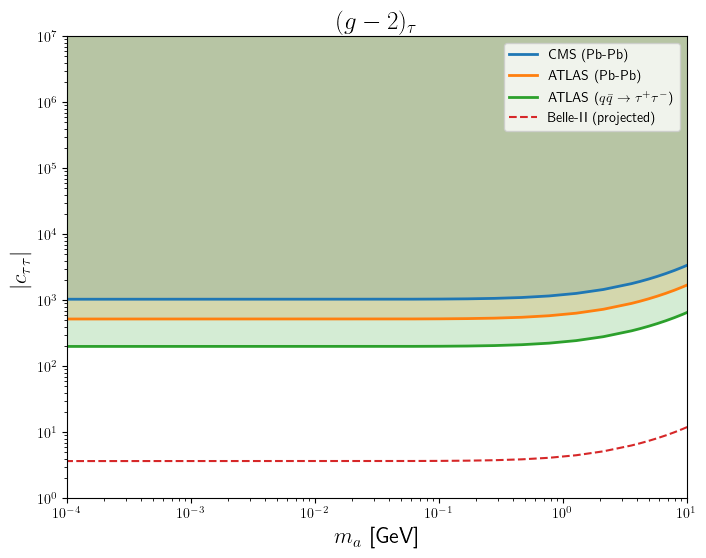

In [22]:
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x_ma, bound_CMS, label=r'CMS (Pb-Pb)', lw=2)
plt.fill_between(x_ma, bound_CMS, 1e7, alpha=0.2)
plt.plot(x_ma, bound_ATLASPb, label=r'ATLAS (Pb-Pb)', lw=2)
plt.fill_between(x_ma, bound_ATLASPb, 1e7, alpha=0.2)
plt.plot(x_ma, bound_ATLASpair, label=r'ATLAS ($q\bar{q}\to\tau^+\tau^-$)', lw=2)
plt.fill_between(x_ma, bound_ATLASpair, 1e7, alpha=0.2)

plt.plot(x_ma, bound_BelleII, label=r'Belle-II (projected)', ls='dashed')
plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{\tau\tau}|$', fontsize=16)
plt.title(r'$(g-2)_\tau$', fontsize=18)
plt.xlim(1e-4, 10)
plt.ylim(1, 1e7)
plt.legend()
plt.savefig('g2tau.png')

In [23]:
with open('g2tau.dat', 'wt') as f:
    f.write('ma_GeV\tctau_ATLAS_pair\tctau_BelleII_proj\n')
    for ma, bATLAS, bBELLE in zip(x_ma, bound_ATLASpair, bound_BelleII):
        f.write(f'{ma}\t{bATLAS}\t{bBELLE}\n')